In [8]:
data.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,17.685,1.01,Female,No,Sun,Dinner,2
1,17.685,1.66,Male,No,Sun,Dinner,3
2,17.685,3.50,Male,No,Sun,Dinner,3
3,17.685,3.31,Male,No,Sun,Dinner,2
4,17.685,3.61,Female,No,Sun,Dinner,4
5,17.685,4.71,Male,No,Sun,Dinner,4
6,8.770,2.00,Male,No,Sun,Dinner,2
7,26.880,3.12,Male,No,Sun,Dinner,4
8,15.040,1.96,Male,No,Sun,Dinner,2
9,14.780,3.23,Male,No,Sun,Dinner,2


In [9]:
data.shape

(244, 7)

In [2]:
# 1. Preprocess the dataset
# Introduce missing values for demonstration (optional)
data.loc[0:5, 'total_bill'] = np.nan
print("Missing values before preprocessing:")
print(data.isnull().sum())

Missing values before preprocessing:
total_bill    6
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [3]:
# Handle missing values by filling with the median of numerical columns
numerical_columns = ['total_bill', 'tip', 'size']
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())


In [4]:
# Check missing values after preprocessing
print("\nMissing values after preprocessing:")
print(data.isnull().sum())



Missing values after preprocessing:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [5]:
# 2. Detect and Remove Outliers (Using Z-score Method)
# Calculate Z-scores for numerical columns
z_scores = np.abs(zscore(data[numerical_columns]))  # Calculate Z-scores
threshold = 3  # Outlier threshold
outliers = (z_scores > threshold)  # Detect outliers
print("\nRows identified as outliers based on Z-score threshold:")
print(data[np.any(outliers, axis=1)])

# Remove rows where any of the Z-scores are above the threshold
data_cleaned = data[~np.any(outliers, axis=1)]

# Check the shape of the cleaned dataset
print("\nShape of cleaned dataset (after removing outliers):", data_cleaned.shape)


Rows identified as outliers based on Z-score threshold:
     total_bill    tip     sex smoker   day    time  size
23        39.42   7.58    Male     No   Sat  Dinner     4
59        48.27   6.73    Male     No   Sat  Dinner     4
125       29.80   4.20  Female     No  Thur   Lunch     6
141       34.30   6.70    Male     No  Thur   Lunch     6
143       27.05   5.00  Female     No  Thur   Lunch     6
156       48.17   5.00    Male     No   Sun  Dinner     6
170       50.81  10.00    Male    Yes   Sat  Dinner     3
212       48.33   9.00    Male     No   Sat  Dinner     4

Shape of cleaned dataset (after removing outliers): (236, 7)


In [10]:
# 3. Validating & Exploring Data Manipulations

# a) Summarizing the Data
print("\nSummary statistics of numerical columns:")
print(data_cleaned[numerical_columns].describe())


Summary statistics of numerical columns:
       total_bill         tip        size
count  236.000000  236.000000  236.000000
mean    19.007754    2.870212    2.491525
std      7.944354    1.163667    0.837888
min      3.070000    1.000000    1.000000
25%     13.277500    2.000000    2.000000
50%     17.550000    2.745000    2.000000
75%     22.775000    3.500000    3.000000
max     45.350000    6.500000    5.000000


In [11]:
# b) Sorting the Data by 'total_bill'
sorted_data = data_cleaned.sort_values(by='total_bill', ascending=False)
print("\nTop 5 rows sorted by 'total_bill':")
print(sorted_data.head())


Top 5 rows sorted by 'total_bill':
     total_bill  tip     sex smoker   day    time  size
182       45.35  3.5    Male    Yes   Sun  Dinner     3
102       44.30  2.5  Female    Yes   Sat  Dinner     3
197       43.11  5.0  Female    Yes  Thur   Lunch     4
142       41.19  5.0    Male     No  Thur   Lunch     5
184       40.55  3.0    Male    Yes   Sun  Dinner     2


In [12]:
# c) Subsetting the Data based on 'day'
subset_data = data_cleaned[data_cleaned['day'] == 'Sun']
print("\nSubset of data for 'Sun' day:")
print(subset_data.head())


Subset of data for 'Sun' day:
   total_bill   tip     sex smoker  day    time  size
0      17.685  1.01  Female     No  Sun  Dinner     2
1      17.685  1.66    Male     No  Sun  Dinner     3
2      17.685  3.50    Male     No  Sun  Dinner     3
3      17.685  3.31    Male     No  Sun  Dinner     2
4      17.685  3.61  Female     No  Sun  Dinner     4


In [13]:
# d) Merging two datasets (e.g., add a new column 'total_bill_with_tip' to the cleaned dataset)
data_cleaned['total_bill_with_tip'] = data_cleaned['total_bill'] + data_cleaned['tip']
print("\nCleaned dataset with 'total_bill_with_tip' column:")
print(data_cleaned.head())



Cleaned dataset with 'total_bill_with_tip' column:
   total_bill   tip     sex smoker  day    time  size  total_bill_with_tip
0      17.685  1.01  Female     No  Sun  Dinner     2               18.695
1      17.685  1.66    Male     No  Sun  Dinner     3               19.345
2      17.685  3.50    Male     No  Sun  Dinner     3               21.185
3      17.685  3.31    Male     No  Sun  Dinner     2               20.995
4      17.685  3.61  Female     No  Sun  Dinner     4               21.295


/tmp/ipykernel_42775/3648745178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['total_bill_with_tip'] = data_cleaned['total_bill'] + data_cleaned['tip']


In [14]:
# e) Joining the cleaned data with itself (e.g., a self join based on 'size')
joined_data = pd.merge(data_cleaned, data_cleaned, on='size', suffixes=('_left', '_right'))
print("\nJoined dataset on 'size' column:")
print(joined_data.head())



Joined dataset on 'size' column:
   total_bill_left  tip_left sex_left smoker_left day_left time_left  size  \
0           17.685      1.01   Female          No      Sun    Dinner     2   
1           17.685      1.01   Female          No      Sun    Dinner     2   
2           17.685      1.01   Female          No      Sun    Dinner     2   
3           17.685      1.01   Female          No      Sun    Dinner     2   
4           17.685      1.01   Female          No      Sun    Dinner     2   

   total_bill_with_tip_left  total_bill_right  tip_right sex_right  \
0                    18.695            17.685       1.01    Female   
1                    18.695            17.685       3.31      Male   
2                    18.695             8.770       2.00      Male   
3                    18.695            15.040       1.96      Male   
4                    18.695            14.780       3.23      Male   

  smoker_right day_right time_right  total_bill_with_tip_right  
0          

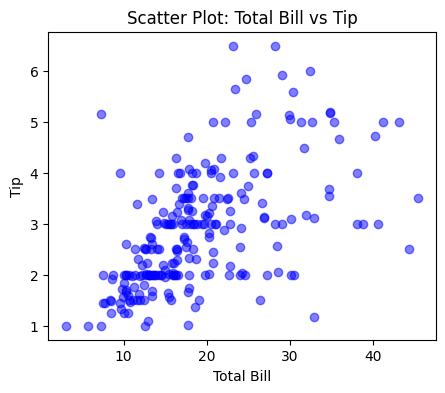

In [16]:
# 4. Data Visualization using Matplotlib

# a) Scatter Plot: Relationship between 'total_bill' and 'tip'
plt.figure(figsize=(5, 4))
plt.scatter(data_cleaned['total_bill'], data_cleaned['tip'], color='blue', alpha=0.5)
plt.title('Scatter Plot: Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

/tmp/ipykernel_42775/1221097859.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x='day', y='total_bill', palette='Set2')


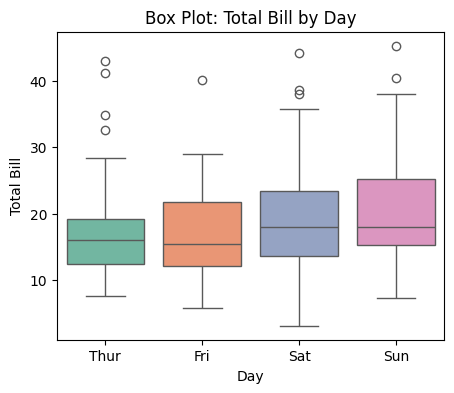

In [18]:
# b) Box Plot: Distribution of 'total_bill' across days
plt.figure(figsize=(5, 4))
sns.boxplot(data=data_cleaned, x='day', y='total_bill', palette='Set2')
plt.title('Box Plot: Total Bill by Day')
plt.xlabel('Day')
plt.ylabel('Total Bill')
plt.show()